In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset=pd.read_csv('Salary_Data.csv')

# Import dataset
# Placed at x-y axis
x_true = dataset.iloc[:,:-1].values
y_true = dataset.iloc[:,1].values
N = np.size(x_true)

x_true.shape,y_true.shape,N

((30, 1), (30,), 30)

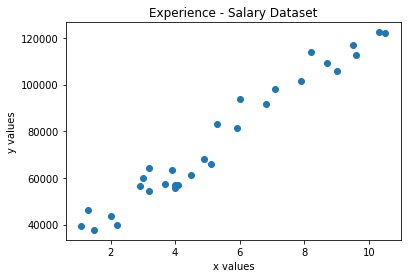

In [3]:
# Plotting the training data
plt.scatter(x_true,y_true)
plt.title("Experience - Salary Dataset")
plt.xlabel("x values")
plt.ylabel("y values")
plt.savefig("train_data")
plt.show()

In [4]:
# Normalize the training data
x_mean = x_true.mean()
x_std = x_true.std()

y_mean = y_true.mean()
y_std = y_true.std()

x_normal = (x_true - x_mean) / x_std
y_normal = (y_true - y_mean) / y_std

x_normal.shape,y_normal.shape

((30, 1), (30,))

In [5]:
# Placeholders
with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32,(N,1))
    y = tf.placeholder(tf.float32,(N,))
x,y

(<tf.Tensor 'placeholders/Placeholder:0' shape=(30, 1) dtype=float32>,
 <tf.Tensor 'placeholders/Placeholder_1:0' shape=(30,) dtype=float32>)

In [6]:
# Weights --> m and n
with tf.name_scope("weights"):
    m = tf.Variable(tf.random_normal((1,1)))
    n = tf.Variable(tf.random_normal((1,)))
m,n

(<tf.Variable 'weights/Variable:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'weights/Variable_1:0' shape=(1,) dtype=float32_ref>)

In [7]:
# y = m*x + n
with tf.name_scope("prediction"):
    y_pred = tf.matmul(x,m) + n
y_pred

<tf.Tensor 'prediction/add:0' shape=(30, 1) dtype=float32>

In [8]:
# Squared error --> (y - y_pred) ** 2
with tf.name_scope("loss"):
    l = tf.reduce_sum((y - tf.squeeze(y_pred))**2)
l

<tf.Tensor 'loss/Sum:0' shape=() dtype=float32>

In [9]:
# Adam Optimizer minimizing the squared error
with tf.name_scope("optim"):
    train_op = tf.train.AdamOptimizer(.001).minimize(l)
train_op

<tf.Operation 'optim/Adam' type=NoOp>

In [10]:
with tf.name_scope("summaries"):
    tf.summary.scalar("loss",l)
    merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('/tensor_flow/linear_regression', tf.get_default_graph())

In [11]:
iteration = 4000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training the model
    for i in range(iteration):
        feed_dict = {x:x_normal,y:y_normal}
        _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
        print("step %d, loss: %f" % (i, loss))
        train_writer.add_summary(summary, i)

    # Get weights
    m_pred, n_pred = sess.run([m, n])
    
    # Make Predictions
    y_pred_final = sess.run(y_pred, feed_dict={x: x_normal})

step 0, loss: 160.060425
step 1, loss: 159.898315
step 2, loss: 159.736328
step 3, loss: 159.574493
step 4, loss: 159.412750
step 5, loss: 159.251144
step 6, loss: 159.089661
step 7, loss: 158.928329
step 8, loss: 158.767120
step 9, loss: 158.606064
step 10, loss: 158.445129
step 11, loss: 158.284348
step 12, loss: 158.123688
step 13, loss: 157.963196
step 14, loss: 157.802856
step 15, loss: 157.642654
step 16, loss: 157.482605
step 17, loss: 157.322678
step 18, loss: 157.162949
step 19, loss: 157.003342
step 20, loss: 156.843887
step 21, loss: 156.684601
step 22, loss: 156.525467
step 23, loss: 156.366501
step 24, loss: 156.207672
step 25, loss: 156.049042
step 26, loss: 155.890503
step 27, loss: 155.732178
step 28, loss: 155.574020
step 29, loss: 155.416031
step 30, loss: 155.258179
step 31, loss: 155.100494
step 32, loss: 154.942978
step 33, loss: 154.785645
step 34, loss: 154.628464
step 35, loss: 154.471436
step 36, loss: 154.314590
step 37, loss: 154.157928
step 38, loss: 154.001

step 313, loss: 116.815811
step 314, loss: 116.699203
step 315, loss: 116.582718
step 316, loss: 116.466354
step 317, loss: 116.350098
step 318, loss: 116.233940
step 319, loss: 116.117920
step 320, loss: 116.002014
step 321, loss: 115.886215
step 322, loss: 115.770531
step 323, loss: 115.654968
step 324, loss: 115.539513
step 325, loss: 115.424171
step 326, loss: 115.308960
step 327, loss: 115.193863
step 328, loss: 115.078857
step 329, loss: 114.963959
step 330, loss: 114.849190
step 331, loss: 114.734535
step 332, loss: 114.619995
step 333, loss: 114.505554
step 334, loss: 114.391235
step 335, loss: 114.277031
step 336, loss: 114.162933
step 337, loss: 114.048950
step 338, loss: 113.935097
step 339, loss: 113.821327
step 340, loss: 113.707680
step 341, loss: 113.594139
step 342, loss: 113.480728
step 343, loss: 113.367401
step 344, loss: 113.254196
step 345, loss: 113.141098
step 346, loss: 113.028122
step 347, loss: 112.915253
step 348, loss: 112.802490
step 349, loss: 112.689827
s

step 645, loss: 83.499504
step 646, loss: 83.413071
step 647, loss: 83.326691
step 648, loss: 83.240387
step 649, loss: 83.154144
step 650, loss: 83.067978
step 651, loss: 82.981895
step 652, loss: 82.895874
step 653, loss: 82.809929
step 654, loss: 82.724052
step 655, loss: 82.638237
step 656, loss: 82.552513
step 657, loss: 82.466850
step 658, loss: 82.381264
step 659, loss: 82.295738
step 660, loss: 82.210289
step 661, loss: 82.124908
step 662, loss: 82.039597
step 663, loss: 81.954361
step 664, loss: 81.869179
step 665, loss: 81.784096
step 666, loss: 81.699066
step 667, loss: 81.614113
step 668, loss: 81.529221
step 669, loss: 81.444405
step 670, loss: 81.359650
step 671, loss: 81.274994
step 672, loss: 81.190376
step 673, loss: 81.105843
step 674, loss: 81.021370
step 675, loss: 80.936989
step 676, loss: 80.852661
step 677, loss: 80.768402
step 678, loss: 80.684204
step 679, loss: 80.600098
step 680, loss: 80.516052
step 681, loss: 80.432083
step 682, loss: 80.348167
step 683, lo

step 972, loss: 58.713585
step 973, loss: 58.647648
step 974, loss: 58.581772
step 975, loss: 58.515953
step 976, loss: 58.450191
step 977, loss: 58.384483
step 978, loss: 58.318825
step 979, loss: 58.253227
step 980, loss: 58.187695
step 981, loss: 58.122204
step 982, loss: 58.056778
step 983, loss: 57.991402
step 984, loss: 57.926083
step 985, loss: 57.860817
step 986, loss: 57.795616
step 987, loss: 57.730465
step 988, loss: 57.665363
step 989, loss: 57.600323
step 990, loss: 57.535332
step 991, loss: 57.470406
step 992, loss: 57.405533
step 993, loss: 57.340710
step 994, loss: 57.275944
step 995, loss: 57.211235
step 996, loss: 57.146584
step 997, loss: 57.081989
step 998, loss: 57.017441
step 999, loss: 56.952950
step 1000, loss: 56.888515
step 1001, loss: 56.824135
step 1002, loss: 56.759815
step 1003, loss: 56.695541
step 1004, loss: 56.631329
step 1005, loss: 56.567165
step 1006, loss: 56.503067
step 1007, loss: 56.439022
step 1008, loss: 56.375023
step 1009, loss: 56.311077
st

step 1328, loss: 38.546989
step 1329, loss: 38.499062
step 1330, loss: 38.451180
step 1331, loss: 38.403343
step 1332, loss: 38.355556
step 1333, loss: 38.307816
step 1334, loss: 38.260120
step 1335, loss: 38.212463
step 1336, loss: 38.164856
step 1337, loss: 38.117287
step 1338, loss: 38.069771
step 1339, loss: 38.022301
step 1340, loss: 37.974884
step 1341, loss: 37.927502
step 1342, loss: 37.880165
step 1343, loss: 37.832870
step 1344, loss: 37.785625
step 1345, loss: 37.738426
step 1346, loss: 37.691273
step 1347, loss: 37.644165
step 1348, loss: 37.597095
step 1349, loss: 37.550076
step 1350, loss: 37.503101
step 1351, loss: 37.456169
step 1352, loss: 37.409283
step 1353, loss: 37.362450
step 1354, loss: 37.315655
step 1355, loss: 37.268902
step 1356, loss: 37.222195
step 1357, loss: 37.175529
step 1358, loss: 37.128918
step 1359, loss: 37.082348
step 1360, loss: 37.035824
step 1361, loss: 36.989346
step 1362, loss: 36.942905
step 1363, loss: 36.896515
step 1364, loss: 36.850166
s

step 1738, loss: 22.415222
step 1739, loss: 22.383778
step 1740, loss: 22.352371
step 1741, loss: 22.320997
step 1742, loss: 22.289656
step 1743, loss: 22.258348
step 1744, loss: 22.227077
step 1745, loss: 22.195843
step 1746, loss: 22.164642
step 1747, loss: 22.133480
step 1748, loss: 22.102350
step 1749, loss: 22.071255
step 1750, loss: 22.040194
step 1751, loss: 22.009167
step 1752, loss: 21.978174
step 1753, loss: 21.947218
step 1754, loss: 21.916296
step 1755, loss: 21.885408
step 1756, loss: 21.854557
step 1757, loss: 21.823742
step 1758, loss: 21.792953
step 1759, loss: 21.762205
step 1760, loss: 21.731491
step 1761, loss: 21.700809
step 1762, loss: 21.670166
step 1763, loss: 21.639555
step 1764, loss: 21.608976
step 1765, loss: 21.578436
step 1766, loss: 21.547926
step 1767, loss: 21.517454
step 1768, loss: 21.487015
step 1769, loss: 21.456608
step 1770, loss: 21.426237
step 1771, loss: 21.395901
step 1772, loss: 21.365602
step 1773, loss: 21.335333
step 1774, loss: 21.305099
s

step 2092, loss: 13.296082
step 2093, loss: 13.275549
step 2094, loss: 13.255044
step 2095, loss: 13.234564
step 2096, loss: 13.214111
step 2097, loss: 13.193684
step 2098, loss: 13.173285
step 2099, loss: 13.152912
step 2100, loss: 13.132565
step 2101, loss: 13.112242
step 2102, loss: 13.091949
step 2103, loss: 13.071682
step 2104, loss: 13.051439
step 2105, loss: 13.031225
step 2106, loss: 13.011037
step 2107, loss: 12.990876
step 2108, loss: 12.970743
step 2109, loss: 12.950634
step 2110, loss: 12.930553
step 2111, loss: 12.910498
step 2112, loss: 12.890469
step 2113, loss: 12.870466
step 2114, loss: 12.850491
step 2115, loss: 12.830538
step 2116, loss: 12.810614
step 2117, loss: 12.790716
step 2118, loss: 12.770844
step 2119, loss: 12.750998
step 2120, loss: 12.731177
step 2121, loss: 12.711383
step 2122, loss: 12.691616
step 2123, loss: 12.671877
step 2124, loss: 12.652162
step 2125, loss: 12.632474
step 2126, loss: 12.612810
step 2127, loss: 12.593175
step 2128, loss: 12.573563
s

step 2519, loss: 6.680484
step 2520, loss: 6.669417
step 2521, loss: 6.658368
step 2522, loss: 6.647335
step 2523, loss: 6.636321
step 2524, loss: 6.625325
step 2525, loss: 6.614347
step 2526, loss: 6.603385
step 2527, loss: 6.592442
step 2528, loss: 6.581516
step 2529, loss: 6.570608
step 2530, loss: 6.559718
step 2531, loss: 6.548845
step 2532, loss: 6.537990
step 2533, loss: 6.527152
step 2534, loss: 6.516332
step 2535, loss: 6.505529
step 2536, loss: 6.494744
step 2537, loss: 6.483977
step 2538, loss: 6.473226
step 2539, loss: 6.462494
step 2540, loss: 6.451778
step 2541, loss: 6.441081
step 2542, loss: 6.430400
step 2543, loss: 6.419737
step 2544, loss: 6.409091
step 2545, loss: 6.398462
step 2546, loss: 6.387851
step 2547, loss: 6.377256
step 2548, loss: 6.366679
step 2549, loss: 6.356120
step 2550, loss: 6.345578
step 2551, loss: 6.335052
step 2552, loss: 6.324544
step 2553, loss: 6.314054
step 2554, loss: 6.303580
step 2555, loss: 6.293123
step 2556, loss: 6.282685
step 2557, l

step 2834, loss: 3.977715
step 2835, loss: 3.971340
step 2836, loss: 3.964977
step 2837, loss: 3.958627
step 2838, loss: 3.952287
step 2839, loss: 3.945961
step 2840, loss: 3.939646
step 2841, loss: 3.933343
step 2842, loss: 3.927052
step 2843, loss: 3.920774
step 2844, loss: 3.914507
step 2845, loss: 3.908252
step 2846, loss: 3.902010
step 2847, loss: 3.895779
step 2848, loss: 3.889560
step 2849, loss: 3.883353
step 2850, loss: 3.877158
step 2851, loss: 3.870975
step 2852, loss: 3.864804
step 2853, loss: 3.858645
step 2854, loss: 3.852497
step 2855, loss: 3.846362
step 2856, loss: 3.840238
step 2857, loss: 3.834126
step 2858, loss: 3.828025
step 2859, loss: 3.821937
step 2860, loss: 3.815860
step 2861, loss: 3.809795
step 2862, loss: 3.803742
step 2863, loss: 3.797700
step 2864, loss: 3.791670
step 2865, loss: 3.785652
step 2866, loss: 3.779645
step 2867, loss: 3.773650
step 2868, loss: 3.767666
step 2869, loss: 3.761695
step 2870, loss: 3.755734
step 2871, loss: 3.749785
step 2872, l

step 3242, loss: 2.212241
step 3243, loss: 2.209580
step 3244, loss: 2.206924
step 3245, loss: 2.204275
step 3246, loss: 2.201632
step 3247, loss: 2.198996
step 3248, loss: 2.196366
step 3249, loss: 2.193743
step 3250, loss: 2.191125
step 3251, loss: 2.188514
step 3252, loss: 2.185910
step 3253, loss: 2.183311
step 3254, loss: 2.180719
step 3255, loss: 2.178133
step 3256, loss: 2.175553
step 3257, loss: 2.172980
step 3258, loss: 2.170412
step 3259, loss: 2.167851
step 3260, loss: 2.165297
step 3261, loss: 2.162748
step 3262, loss: 2.160205
step 3263, loss: 2.157669
step 3264, loss: 2.155139
step 3265, loss: 2.152615
step 3266, loss: 2.150097
step 3267, loss: 2.147585
step 3268, loss: 2.145080
step 3269, loss: 2.142580
step 3270, loss: 2.140086
step 3271, loss: 2.137599
step 3272, loss: 2.135117
step 3273, loss: 2.132642
step 3274, loss: 2.130173
step 3275, loss: 2.127709
step 3276, loss: 2.125252
step 3277, loss: 2.122801
step 3278, loss: 2.120356
step 3279, loss: 2.117917
step 3280, l

step 3601, loss: 1.586452
step 3602, loss: 1.585430
step 3603, loss: 1.584412
step 3604, loss: 1.583397
step 3605, loss: 1.582385
step 3606, loss: 1.581376
step 3607, loss: 1.580369
step 3608, loss: 1.579366
step 3609, loss: 1.578366
step 3610, loss: 1.577368
step 3611, loss: 1.576374
step 3612, loss: 1.575383
step 3613, loss: 1.574394
step 3614, loss: 1.573409
step 3615, loss: 1.572426
step 3616, loss: 1.571446
step 3617, loss: 1.570470
step 3618, loss: 1.569496
step 3619, loss: 1.568525
step 3620, loss: 1.567557
step 3621, loss: 1.566592
step 3622, loss: 1.565630
step 3623, loss: 1.564670
step 3624, loss: 1.563714
step 3625, loss: 1.562760
step 3626, loss: 1.561809
step 3627, loss: 1.560861
step 3628, loss: 1.559916
step 3629, loss: 1.558974
step 3630, loss: 1.558035
step 3631, loss: 1.557098
step 3632, loss: 1.556164
step 3633, loss: 1.555233
step 3634, loss: 1.554305
step 3635, loss: 1.553380
step 3636, loss: 1.552457
step 3637, loss: 1.551537
step 3638, loss: 1.550620
step 3639, l

step 3996, loss: 1.356067
step 3997, loss: 1.355793
step 3998, loss: 1.355520
step 3999, loss: 1.355248


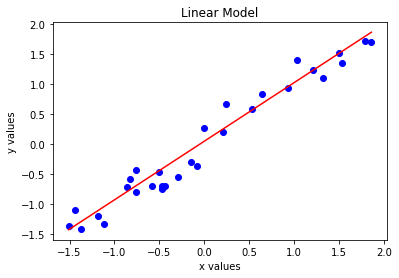

In [12]:
# Visualising the Normalized data
plt.scatter(x_normal,y_normal,color='blue')
plt.plot(x_normal,y_pred_final,color='red')
plt.title('Linear Model')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

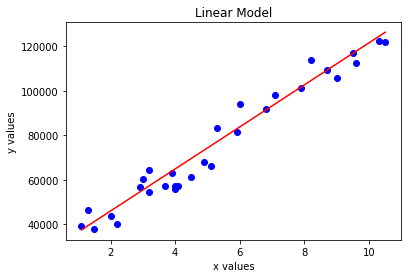

In [13]:
# Visualising the Training data
plt.scatter(x_true,y_true,color='blue')
plt.plot(x_true,y_pred_final * y_std + y_mean,color='red')
plt.title('Linear Model')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

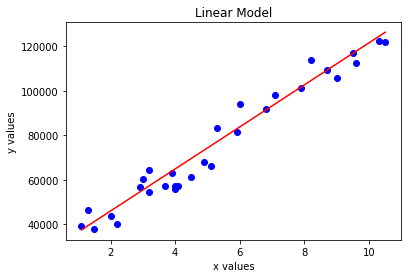

In [14]:
# Predicting new values
def predict(x_new):
    x_normal = (x_new - x_mean) / x_std
    y_normal = m * x_normal + n
    y_pred = y_normal * y_std + y_mean
    return y_pred

plt.scatter(x_true,y_true,color='blue')
plt.plot(x_true,y_pred_final * y_std + y_mean,color='red')
plt.title('Linear Model')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()